# Linear Regression
###     (preliminary: Linear Model)
## 1. Library and Data, Preprocessing
## 2. Compute W and b with 3 methods 

## 3. [Advanced] Regularization: Ridge, Lasso

# Library

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

import torch
import torch.nn as nn # for neural network models
import torch.optim as optim # for optimization 
import torch.nn.init as init # for initialization 

# simple data

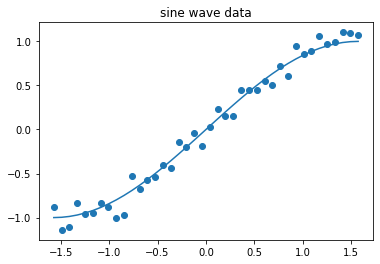

In [2]:
plt.figure()

# true data
N = 40 #실습할 데이터 갯수
X = np.linspace(-np.pi/2, np.pi/2, N).reshape(N, 1) # linspace(시작점,끝점,사이에 몇개를 가지고올래)
y = np.sin(X)
plt.plot(X, y)

# add noise
y += 0.1*np.random.randn(N, 1)

plt.scatter(X, y)
plt.title('sine wave data')
plt.show()

# Make feature

In [3]:
n_feature = 2

PHI = np.ones(X.shape[0]).reshape(-1, 1) # 40 x 1
for i in range(1, n_feature):
    PHI = np.concatenate((PHI, np.power(X, i)), axis=1)
print('PHI.shape: ', PHI.shape) # 40 x 2
print('PHI[:3] \n', PHI[:3])

# shuffle
idx = np.random.permutation(N)
shuffle_X = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

PHI.shape:  (40, 2)
PHI[:3] 
 [[ 1.         -1.57079633]
 [ 1.         -1.49024267]
 [ 1.         -1.40968901]]


# Split train / test dataset

In [4]:
n = N-20 

# train data
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

print(PHI_train)
print(PHI_train.shape)

# test data
X_test = shuffle_X[:]
PHI_test = shuffle_PHI[:]
y_test = shuffle_y[:]

print(PHI_test)
print(PHI_test.shape)

[[ 1.          1.57079633]
 [ 1.         -1.2485817 ]
 [ 1.         -0.52359878]
 [ 1.          0.36249146]
 [ 1.          0.20138414]
 [ 1.          0.44304512]
 [ 1.          0.52359878]
 [ 1.         -0.76525975]
 [ 1.          1.40968901]
 [ 1.          0.84581341]
 [ 1.         -0.12083049]
 [ 1.         -0.2819378 ]
 [ 1.          1.2485817 ]
 [ 1.         -1.49024267]
 [ 1.         -1.40968901]
 [ 1.          0.60415243]
 [ 1.         -0.68470609]
 [ 1.         -1.08747438]
 [ 1.         -1.57079633]
 [ 1.          0.2819378 ]]
(20, 2)
[[ 1.          1.57079633]
 [ 1.         -1.2485817 ]
 [ 1.         -0.52359878]
 [ 1.          0.36249146]
 [ 1.          0.20138414]
 [ 1.          0.44304512]
 [ 1.          0.52359878]
 [ 1.         -0.76525975]
 [ 1.          1.40968901]
 [ 1.          0.84581341]
 [ 1.         -0.12083049]
 [ 1.         -0.2819378 ]
 [ 1.          1.2485817 ]
 [ 1.         -1.49024267]
 [ 1.         -1.40968901]
 [ 1.          0.60415243]
 [ 1.         -0.68

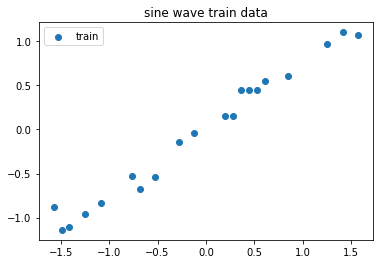

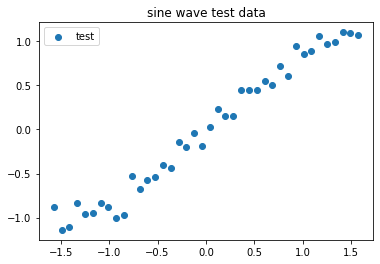

In [5]:
# plot
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

# Linear Regression (Formula)
## method 1: compute W and b with numpy

In [6]:
# compute W_ with PHI_train.
W_ = np.linalg.inv(PHI_train.T @ PHI_train) @ PHI_train.T @ y_train #역함수 구하는것 numpy 에서 @는 matrix 의 곱이다.
print('[b, W] = W_')  
print('W_.shape: ', W_.shape)
print('W_ \n', W_)

[b, W] = W_
W_.shape:  (2, 1)
W_ 
 [[0.01835021]
 [0.74667042]]


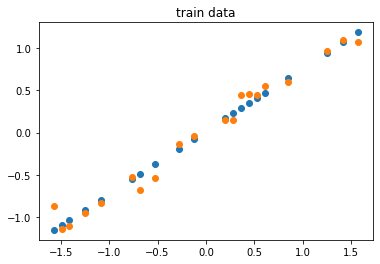

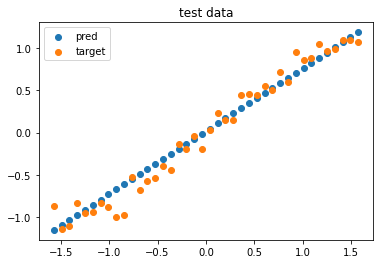

In [7]:
plt.figure()
plt.scatter(X_train, PHI_train @ W_, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, PHI_test @ W_, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Linear Regression (Formula)
## method 2: compute W and b with sklearn library

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('b: ', reg.intercept_) 
print('W: ', reg.coef_)

b:  [0.01835021]
W:  [[0.74667042]]


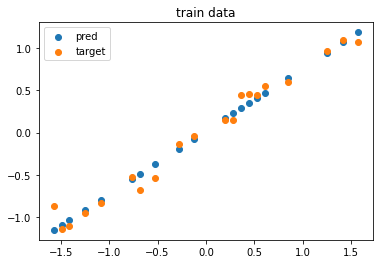

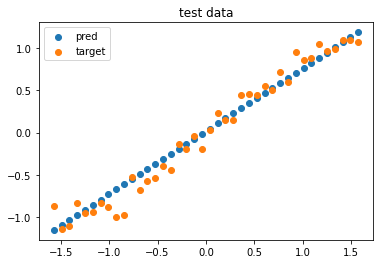

In [9]:
plt.figure()
plt.scatter(X_train, reg.predict(X_train), label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, reg.predict(X_test), label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Linear Regression (Formula)
## method 3: compute W and b with pytorch library (Gradient Descent)

In [10]:
# prepare data
PHI_train = torch.tensor(PHI_train, dtype = torch.float) # if PHI_train is numpy.array
label = torch.tensor(y_train, dtype=torch.float)

# prepare model
model = nn.Linear(n_feature, 1, bias = False) # train without bias. (PHI_train term have 1, have bias already.)

# prepare optimziation and loss function 
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1) #lr = learning rate

# train the model 
for i in range(100):
    optimizer.zero_grad()
    output = model(PHI_train)
    
    loss = loss_function(output, label) #loss계산
    
    loss.backward() 
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
        
    param_list = list(model.parameters())


print('W_ \n', param_list[0][0][0])
print('W_ \n', param_list[0][0][1])

PHI_test = torch.tensor(PHI_test, dtype = torch.float)

y_train_pred = model(PHI_train)
y_test_pred = model(PHI_test)

y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

tensor(1.7004)
tensor(0.0378)
tensor(0.0117)
tensor(0.0113)
tensor(0.0113)
tensor(0.0113)
tensor(0.0113)
tensor(0.0113)
tensor(0.0113)
tensor(0.0113)
W_ 
 tensor(0.0184, grad_fn=<SelectBackward>)
W_ 
 tensor(0.7467, grad_fn=<SelectBackward>)


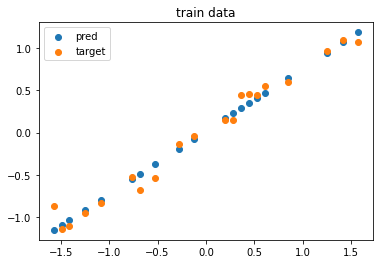

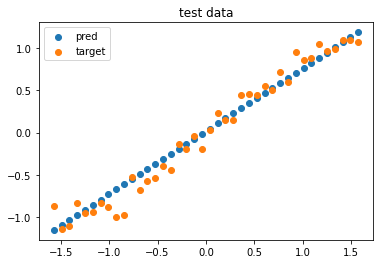

In [11]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Advacned: Regularization (Ridge, Lasso)

In [14]:
# prepare data
PHI_train = PHI_train.clone().detach() # if PHI_train is torch.tensor
label = label.clone().detach()

# prepare model
model = nn.Linear(n_feature, 1, bias = False) # train without bias. (PHI_train term have 1, have bias already.)

# prepare optimziation and loss function 
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

#train model
for i in range(100):
    optimizer.zero_grad()
    output = model(PHI_train)
    
    loss = loss_function(output, label)
    
    # L1 regularization 은 pytorch 에서 제공안해줌
    regularization_coefficent=1e-3
    regularization_loss = 0
    for param in model.parameters(): # model 의 파라미터들을 다 가져옴
        regularization_loss += torch.sum(torch.abs(param)) #L1 regularization 식 구현
        
    regularization_loss = regularization_loss * regularization_coefficent
    regularization_loss = regularization_loss + loss
    
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
        
    param_list = list(model.parameters())


print('b \n', param_list[0][0][0])
print('W_ \n', param_list[0][0][1])

PHI_test = PHI_test.clone().detach()

y_train_pred = model(PHI_train)
y_test_pred = model(PHI_test)

y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

tensor(0.2239)
tensor(0.0146)
tensor(0.0113)
tensor(0.0113)
tensor(0.0113)
tensor(0.0113)
tensor(0.0113)
tensor(0.0113)
tensor(0.0113)
tensor(0.0113)
b 
 tensor(0.0184, grad_fn=<SelectBackward>)
W_ 
 tensor(0.7467, grad_fn=<SelectBackward>)


In [ ]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

In [ ]:
# prepare data
PHI_train = PHI_train.clone().detach() # same with PHI_train = torch.tensor(PHI_train, dtype = torch.float)
label = label.clone().detach()

# prepare model 
model = nn.Linear(n_feature, 1, bias = False) # train without bias. (PHI_train term have 1, have bias already.)

# prepare loss function
loss_function = nn.MSELoss()

# L2 reguliarzation (weight_decay설정해주면됨)
optimizer = optim.SGD(model.parameters(), lr = 0.1, weight_decay = 0.01)

# train the model
for i in range(100):
    optimizer.zero_grad()
    output = model(PHI_train)
    
    loss = loss_function(output, label)
    
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
        
    param_list = list(model.parameters())


print('b \n', param_list[0][0][0])
print('W_ \n', param_list[0][0][1])

PHI_test = PHI_test.clone().detach() # same with PHI_train = torch.tensor(PHI_train, dtype = torch.float)

y_train_pred = model(PHI_train)
y_test_pred = model(PHI_test)

y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [ ]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()